In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("=" * 80)
print("DATA COLLECTION, CLEANING, AND EXPLORATION")
print("=" * 80)

# ============================================================================
# LOAD DATASET
# ============================================================================
print("\n Loading dataset...")

df = pd.read_csv('/content/heart_cleveland_upload.csv')

if 'condition' in df.columns:
    df = df.rename(columns={'condition': 'target'})

df['target_binary'] = (df['target'] > 0).astype(int)

print(" Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nFirst 10 Rows:")
print(df.head(10))

print("\nRandom 5 Rows:")
print(df.sample(5))

print("\nBasic Statistics:")
print(df.describe())
print("\nTarget Variable Distribution:")
print("Original target:")
print(df['target'].value_counts().sort_index())
print("\nBinary target (0=No Disease, 1=Disease):")
print(df['target_binary'].value_counts())
print(f"No Disease: {(df['target_binary']==0).sum()} ({(df['target_binary']==0).sum()/len(df)*100:.1f}%)")
print(f"Disease:    {(df['target_binary']==1).sum()} ({(df['target_binary']==1).sum()/len(df)*100:.1f}%)")



DATA COLLECTION, CLEANING, AND EXPLORATION

 Loading dataset...
 Dataset loaded successfully!
Shape: 297 rows × 15 columns

DATASET OVERVIEW

Column Names and Data Types:
age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
target             int64
target_binary      int64
dtype: object

First 10 Rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0    

In [51]:
# DATA CLEANING
# ============================================================================
print("\n" + "=" * 80)
print("DATA CLEANING")
print("=" * 80)

df_original = df.copy()
original_shape = df.shape

# Missing Values
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total missing: {missing_values.sum()}")

if missing_values.sum() > 0:
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['float64', 'int64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    print(f"After cleaning: {df.isnull().sum().sum()} missing values")
else:
    print("No missing values found!")

# Duplicates
print("\n--- Duplicates ---")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"After removal: {df.shape}")
else:
    print("No duplicates found!")

# Data Validation
print("\n--- Data Validation ---")
print(f"Age range: {df['age'].min():.0f} - {df['age'].max():.0f}")
print(f"Sex values: {sorted(df['sex'].unique())}")
print(f"BP range: {df['trestbps'].min():.0f} - {df['trestbps'].max():.0f}")
print(f"Cholesterol range: {df['chol'].min():.0f} - {df['chol'].max():.0f}")
print(f"Max HR range: {df['thalach'].min():.0f} - {df['thalach'].max():.0f}")

# ============================================================================
#  CLEANING SUMMARY
# ============================================================================
print("\n" + "=" * 80)
print("CLEANING SUMMARY")
print("=" * 80)
print(f"Original shape:     {original_shape}")
print(f"Cleaned shape:      {df.shape}")
print(f"Rows removed:       {original_shape[0] - df.shape[0]}")
print(f"Data retained:      {(df.shape[0] / original_shape[0] * 100):.1f}%")
print(f"Missing values:     {df.isnull().sum().sum()}")
print(f"Duplicates:         0")


DATA CLEANING

--- Missing Values ---
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
target           0
target_binary    0
dtype: int64
Total missing: 0
No missing values found!

--- Duplicates ---
Duplicate rows: 0
No duplicates found!

--- Data Validation ---
Age range: 29 - 77
Sex values: [np.int64(0), np.int64(1)]
BP range: 94 - 200
Cholesterol range: 126 - 564
Max HR range: 71 - 202

CLEANING SUMMARY
Original shape:     (297, 15)
Cleaned shape:      (297, 15)
Rows removed:       0
Data retained:      100.0%
Missing values:     0
Duplicates:         0



EXPLORATORY DATA ANALYSIS


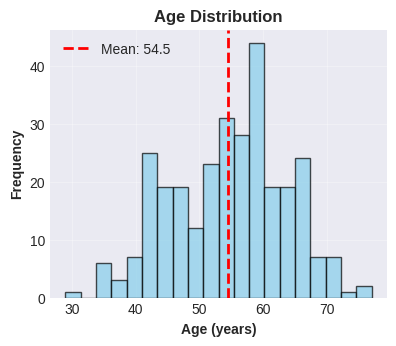

In [52]:
print("\n" + "=" * 80)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Create visualizations
fig = plt.figure(figsize=(20, 16))

# 1. Age Distribution
plt.subplot(4, 4, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age"].mean():.1f}')
plt.xlabel('Age (years)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Age Distribution', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

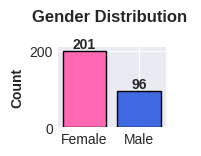

In [53]:
# 2. Sex Distribution
plt.subplot(4, 4, 2)
sex_counts = df['sex'].value_counts()
bars = plt.bar(['Female', 'Male'], sex_counts.values, color=['#FF69B4', '#4169E1'], edgecolor='black')
plt.ylabel('Count', fontweight='bold')
plt.title('Gender Distribution \n', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')



Text(0.5, 1.0, 'Chest Pain Type')

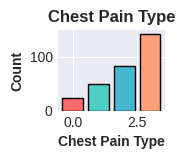

In [54]:
# 3. Chest Pain Type
plt.subplot(4, 4, 3)
cp_counts = df['cp'].value_counts().sort_index()
plt.bar(cp_counts.index, cp_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], edgecolor='black')
plt.xlabel('Chest Pain Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Chest Pain Type', fontweight='bold')

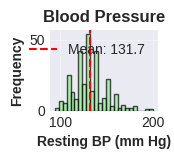

In [55]:
# 4. Blood Pressure
plt.subplot(4, 4, 4)
plt.hist(df['trestbps'], bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(df['trestbps'].mean(), color='red', linestyle='--', label=f'Mean: {df["trestbps"].mean():.1f}')
plt.xlabel('Resting BP (mm Hg)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Blood Pressure', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

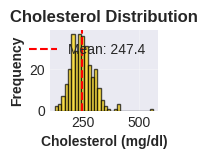

In [56]:
# 5. Cholesterol
plt.subplot(4, 4, 5)
plt.hist(df['chol'], bins=30, color='gold', edgecolor='black', alpha=0.7)
plt.axvline(df['chol'].mean(), color='red', linestyle='--', label=f'Mean: {df["chol"].mean():.1f}')
plt.xlabel('Cholesterol (mg/dl)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Cholesterol Distribution', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

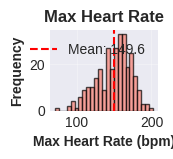

In [57]:
# 6. Max Heart Rate
plt.subplot(4, 4, 6)
plt.hist(df['thalach'], bins=25, color='salmon', edgecolor='black', alpha=0.7)
plt.axvline(df['thalach'].mean(), color='red', linestyle='--', label=f'Mean: {df["thalach"].mean():.1f}')
plt.xlabel('Max Heart Rate (bpm)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Max Heart Rate', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

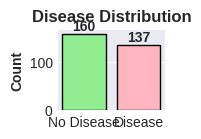

In [58]:
# 7. Target Distribution
plt.subplot(4, 4, 7)
target_counts = df['target_binary'].value_counts()
bars = plt.bar(['No Disease', 'Disease'], target_counts.values, color=['#90EE90', '#FFB6C1'], edgecolor='black')
plt.ylabel('Count', fontweight='bold')
plt.title('Disease Distribution', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

([<matplotlib.axis.XTick at 0x7a640091d040>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

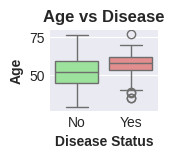

In [59]:
# 8. Age by Disease
plt.subplot(4, 4, 8)
sns.boxplot(x='target_binary', y='age', data=df, palette=['lightgreen', 'lightcoral'])
plt.xlabel('Disease Status', fontweight='bold')
plt.ylabel('Age', fontweight='bold')
plt.title('Age vs Disease', fontweight='bold')
plt.xticks([0, 1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x7a640092aed0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

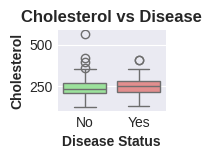

In [60]:
# 9. Cholesterol by Disease
plt.subplot(4, 4, 9)
sns.boxplot(x='target_binary', y='chol', data=df, palette=['lightgreen', 'lightcoral'])
plt.xlabel('Disease Status', fontweight='bold')
plt.ylabel('Cholesterol', fontweight='bold')
plt.title('Cholesterol vs Disease', fontweight='bold')
plt.xticks([0, 1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x7a63faa06f30>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

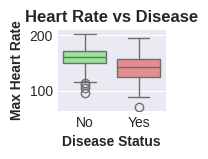

In [61]:
# 10. Heart Rate by Disease
plt.subplot(4, 4, 10)
sns.boxplot(x='target_binary', y='thalach', data=df, palette=['lightgreen', 'lightcoral'])
plt.xlabel('Disease Status', fontweight='bold')
plt.ylabel('Max Heart Rate', fontweight='bold')
plt.title('Heart Rate vs Disease', fontweight='bold')
plt.xticks([0, 1], ['No', 'Yes'])

Text(0.5, 1.0, 'Age vs Cholesterol')

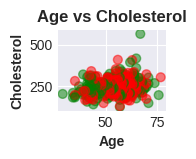

In [62]:
# 11. Age vs Cholesterol
plt.subplot(4, 4, 11)
colors = df['target_binary'].map({0: 'green', 1: 'red'})
plt.scatter(df['age'], df['chol'], c=colors, alpha=0.5, s=40)
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Cholesterol', fontweight='bold')
plt.title('Age vs Cholesterol', fontweight='bold')

Text(0.5, 1.0, 'Age vs Heart Rate')

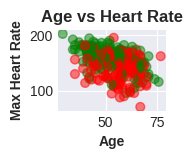

In [63]:
# 12. Age vs Heart Rate
plt.subplot(4, 4, 12)
plt.scatter(df['age'], df['thalach'], c=colors, alpha=0.5, s=40)
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Max Heart Rate', fontweight='bold')
plt.title('Age vs Heart Rate', fontweight='bold')


CORRELATION ANALYSIS

Correlations with Target (Disease):
target           1.000000
target_binary    1.000000
thal             0.520516
ca               0.463189
oldpeak          0.424052
exang            0.421355
cp               0.408945
slope            0.333049
sex              0.278467
age              0.227075
restecg          0.166343
trestbps         0.153490
chol             0.080285
fbs              0.003167
thalach         -0.423817
Name: target_binary, dtype: float64


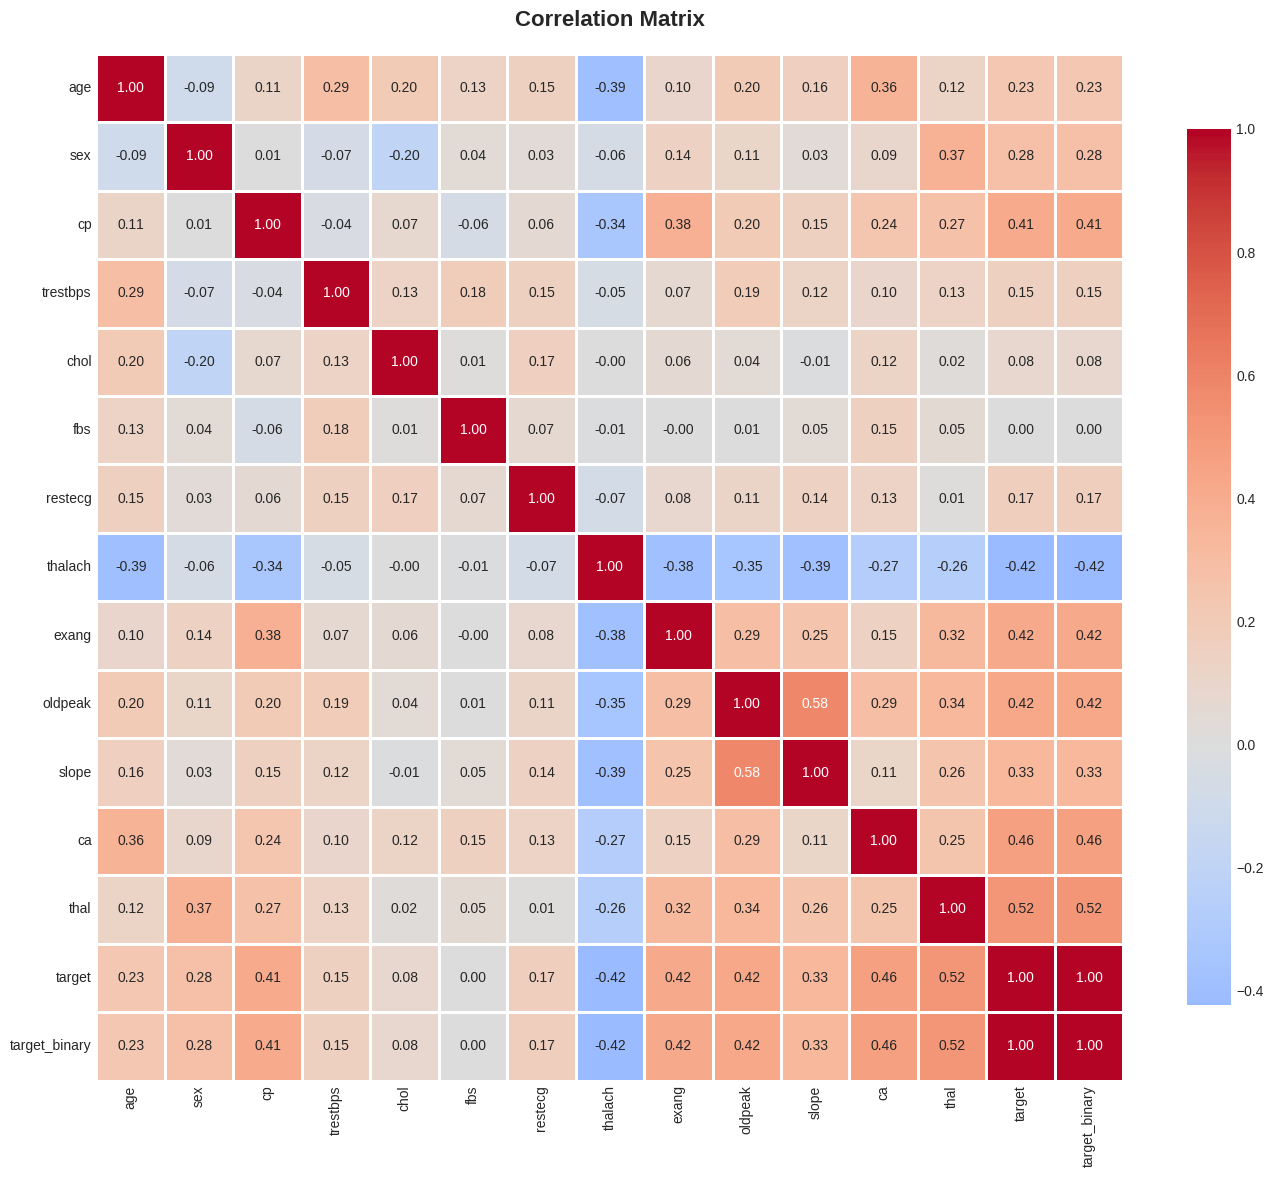

In [64]:
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_features].corr()

print("\nCorrelations with Target (Disease):")
target_corr = correlation_matrix['target_binary'].sort_values(ascending=False)
print(target_corr)

# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
print("\n" + "=" * 80)
print("OUTLIER DETECTION (IQR METHOD)")
print("=" * 80)

outlier_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
outlier_results = []

for feature in outlier_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower) | (df[feature] > upper)]

    outlier_results.append({
        'Feature': feature,
        'Q1': f"{Q1:.2f}",
        'Q3': f"{Q3:.2f}",
        'IQR': f"{IQR:.2f}",
        'Lower': f"{lower:.2f}",
        'Upper': f"{upper:.2f}",
        'Outliers': len(outliers),
        'Percent': f"{len(outliers)/len(df)*100:.1f}%"
    })

outlier_df = pd.DataFrame(outlier_results)
print("\nOutlier Detection Results:")
print(outlier_df.to_string(index=False))


OUTLIER DETECTION (IQR METHOD)

Outlier Detection Results:
 Feature     Q1     Q3   IQR  Lower  Upper  Outliers Percent
     age  48.00  61.00 13.00  28.50  80.50         0    0.0%
trestbps 120.00 140.00 20.00  90.00 170.00         9    3.0%
    chol 211.00 276.00 65.00 113.50 373.50         5    1.7%
 thalach 133.00 166.00 33.00  83.50 215.50         1    0.3%
 oldpeak   0.00   1.60  1.60  -2.40   4.00         5    1.7%
